In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
def load_dataset(base_path, subset):
    subset_path = os.path.join(base_path, subset)
    emotions = os.listdir(subset_path)
    label_map = {emotion: i for i, emotion in enumerate(emotions)}
    images = []
    labels = []

    for emotion, label in label_map.items():
        emotion_path = os.path.join(subset_path, emotion)
        for filename in os.listdir(emotion_path):
            if filename.endswith('.jpg'):
                img_path = os.path.join(emotion_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (48, 48))
                images.append(img)
                labels.append(label)

    return np.array(images), np.array(labels), label_map

In [4]:
# Usage
base_path = r'C:\Users\Akanksha\Desktop\projects\OpenCV'
train_images, train_labels, label_map = load_dataset(base_path, 'train')
test_images, test_labels, _ = load_dataset(base_path, 'test')

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape((-1, 48, 48, 1))
test_images = test_images.reshape((-1, 48, 48, 1))
train_labels = to_categorical(train_labels, num_classes=len(label_map))
test_labels = to_categorical(test_labels, num_classes=len(label_map))

In [6]:
# Create an instance of the ImageDataGenerator with augmentation parameters
data_generator = ImageDataGenerator(
    rotation_range=5,       # Random rotations between -10 to 10 degrees
    width_shift_range=0.1,   # Random horizontal shifts
    height_shift_range=0.1,  # Random vertical shifts
    shear_range=0.1,         # Shear transformations
    zoom_range=0.1,          # Random zoom
    horizontal_flip=True,    # Random horizontal flips
    fill_mode='nearest'      # Strategy for filling newly created pixels
)

In [8]:
from keras import Input
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the model
model = Sequential([
    Input(shape=(48, 48, 1)),  # Specify the input shape here
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_map), activation='softmax')
])


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=15,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Whether to restore model weights from the epoch with the best value of the monitored quantity
)

In [11]:
data_generator.fit(train_images)

history = model.fit(
    data_generator.flow(train_images, train_labels, batch_size=64),
    epochs=50,
    validation_data=(test_images, test_labels),
    steps_per_epoch=len(train_images) // 64,  # Number of batches per epoch
    callbacks=[early_stopping]
)

Epoch 1/50


C:\Users\Akanksha\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 38s 77ms/step - accuracy: 0.2361 - loss: 1.8459 - val_accuracy: 0.2473 - val_loss: 1.7755
Epoch 2/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - accuracy: 0.2812 - loss: 1.7643

C:\Program Files\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2812 - loss: 1.7643 - val_accuracy: 0.2476 - val_loss: 1.7762
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.2671 - loss: 1.7706 - val_accuracy: 0.3328 - val_loss: 1.6786
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2656 - loss: 1.7170 - val_accuracy: 0.3346 - val_loss: 1.6729
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 32s 70ms/step - accuracy: 0.3083 - loss: 1.7151 - val_accuracy: 0.3791 - val_loss: 1.5637
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2656 - loss: 1.7362 - val_accuracy: 0.3799 - val_loss: 1.5663
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 30s 66ms/step - accuracy: 0.3470 - loss: 1.6529 - val_accuracy: 0.4239 - val_loss: 1.4653
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3750 - loss: 1.5434 - val_accuracy: 0.4228 - val_loss: 1.4658
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 28s 63ms/step - accuracy: 0.3728 - loss: 1.5927 - val_accuracy: 0.457

In [12]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4566 - loss: 1.3061
Test accuracy: 0.5511284470558167


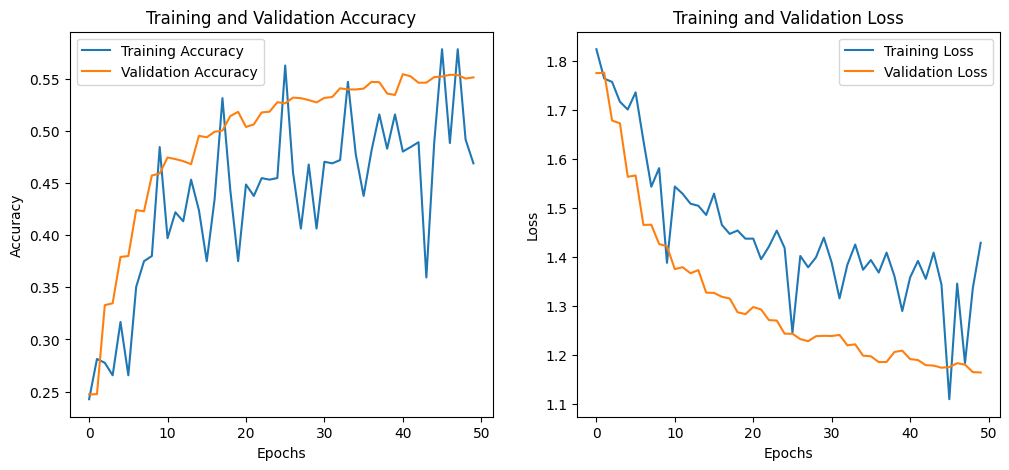

In [13]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [15]:
model.save('emotion_detection_model.keras')

In [16]:
# Load your trained model
model = load_model('emotion_detection_model.keras')

In [24]:
# Load the image you want to test
image_path = r'C:\Users\Akanksha\Desktop\projects\OpenCV\Test2.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [25]:
# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

In [26]:
reverse_label_map = {v: k for k, v in label_map.items()}

In [27]:
# Assuming that you have at least one face detected, preprocess it
for (x, y, w, h) in faces:
    roi_gray = gray_image[y:y+h, x:x+w]  # Extract the ROI
    roi_gray_resized = cv2.resize(roi_gray, (48, 48))  # Resize to the size your model expects
    roi_gray_normalized = roi_gray_resized / 255.0  # Normalize pixel values as during training
    roi_gray_expanded = np.expand_dims(roi_gray_normalized, axis=0)  # Add batch dimension
    roi_gray_final = np.expand_dims(roi_gray_expanded, axis=3)  # Add channel dimension

    # Make a prediction
    prediction = model.predict(roi_gray_final)
    emotion_label = np.argmax(prediction)
    emotion_name = reverse_label_map[emotion_label]  # Replace with your mapping from labels to emotions

    # Display the result
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(image, emotion_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


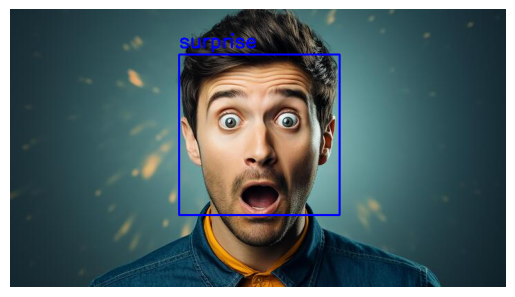

In [28]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis numbers
plt.show()